# **1**.   **Data Exploration**





In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'datatest.xlsx'
data = pd.read_excel(dataset_path)


In [29]:
# Check the structure and types of features
print(data.info())

# Check basic statistics of numerical features
print(data.describe())

# Check for missing values
display(data.isnull().sum())
display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


*All columns have appropriate data and there is no missing data. The data is ready for analysis.*

# **2.   Data Preprocessing**



In [30]:
data.drop('No',axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the numerical features to be normalized
numerical_features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                      'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Normalize the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the dataset into features (X) and target variable (Y)
X = data.drop('Y house price of unit area', axis=1)  # Features
Y = data['Y house price of unit area']  # Target variable

# **3. Feature Selection/Engineering**

Correlation with the target variable:
Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


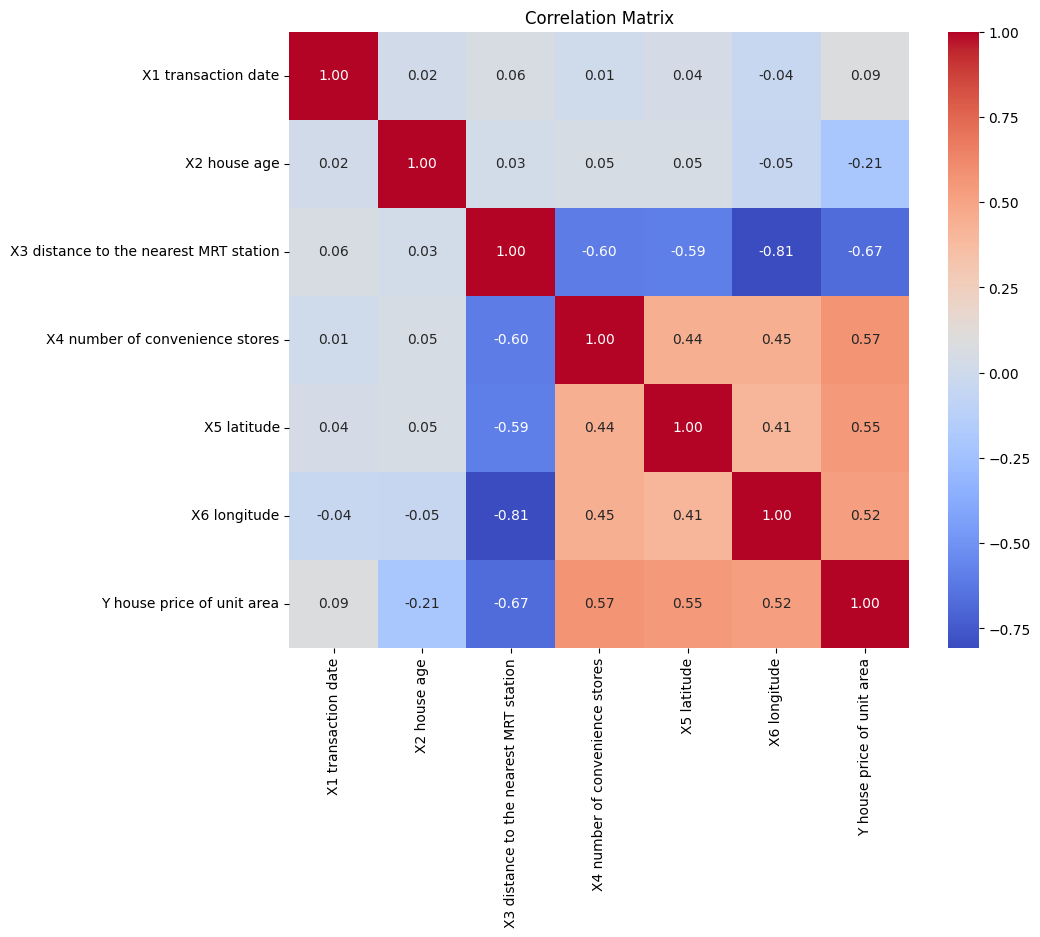

In [32]:
# 3.1 Analyze Correlation Between Features and Target Variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Y house price of unit area'].sort_values(ascending=False)
print("Correlation with the target variable:")
print(correlation_with_target)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [33]:
# 3.2 Select Relevant Features
relevant_features = correlation_with_target[correlation_with_target.abs() > 0.5].index.drop('Y house price of unit area').tolist()
print("\nRelevant features: ")
print(relevant_features)



Relevant features: 
['X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'X3 distance to the nearest MRT station']


In [34]:
# 3.3 Perform Feature Selection/Engineering
# Update the dataset with selected features
selected_data = data[relevant_features]

# Print the first few rows of the updated dataset
print("\nUpdated dataset with selected features:")
display(selected_data)



Updated dataset with selected features:


,X4 number of convenience stores,X5 latitude,X6 longitude,X3 distance to the nearest MRT station
0,1.0,0.616941,0.719323,0.009513
1,0.9,0.584949,0.711451,0.043809
2,0.5,0.671231,0.758896,0.083315
3,0.5,0.671231,0.758896,0.083315
4,0.5,0.573194,0.743153,0.056799
...,...,...,...,...
409,0.0,0.114881,0.326504,0.627820
410,0.9,0.512118,0.750162,0.010375
411,0.7,0.571498,0.715225,0.056861
412,0.5,0.420141,0.723959,0.012596


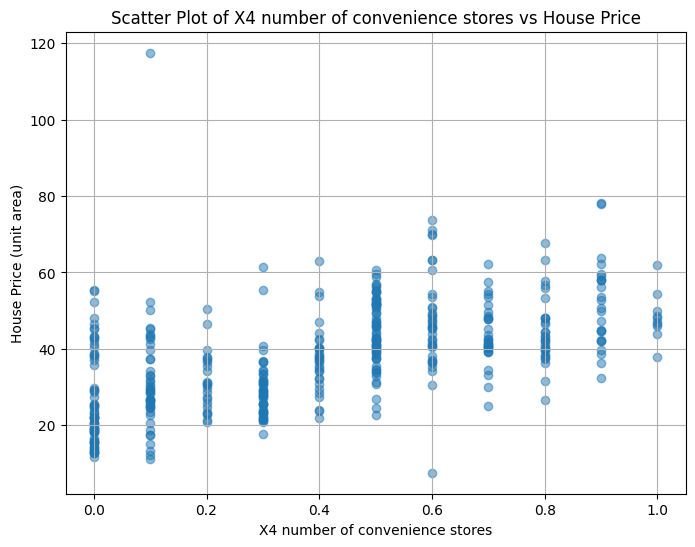

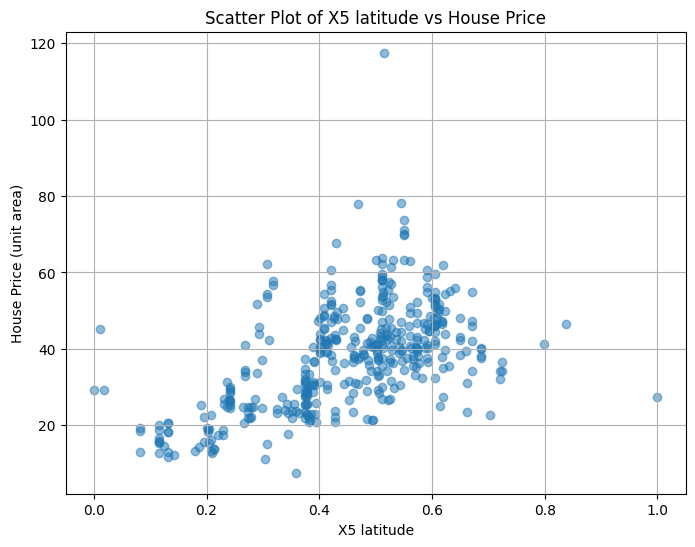

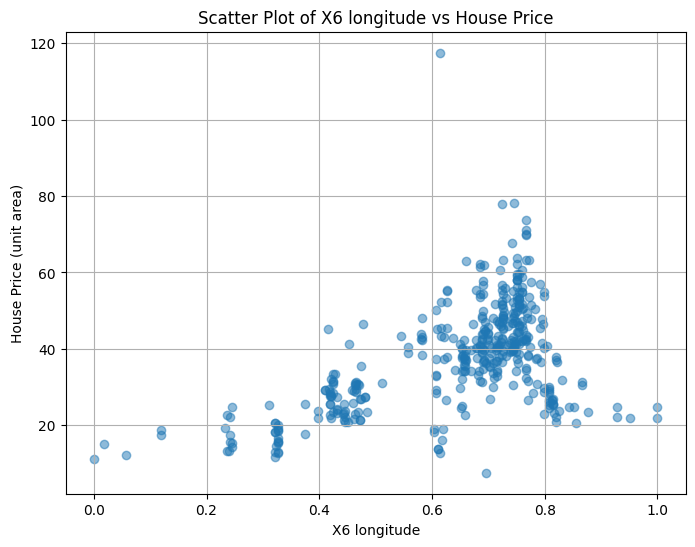

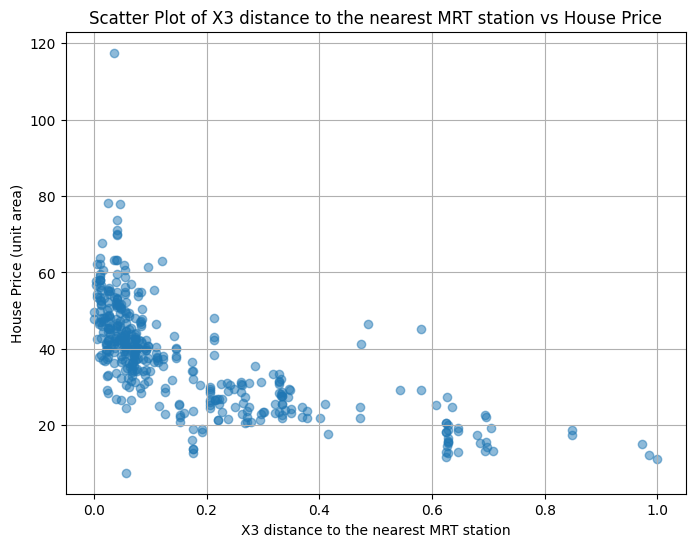

In [35]:
# Plot scatter plots for each relevant feature
for feature in relevant_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['Y house price of unit area'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs House Price')
    plt.xlabel(feature)
    plt.ylabel('House Price (unit area)')
    plt.grid(True)
    plt.show()


# **4.   Model Training**

In [43]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            return Node(value=np.mean(y))

        feature_indices = np.random.choice(n_features, n_features, replace=False)
        best_feature, best_threshold = self._best_criteria(X, y, feature_indices)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        if not np.any(left_indices) or not np.any(right_indices):
            return Node(value=np.mean(y))

        left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left_tree, right_tree)

    def _best_criteria(self, X, y, feature_indices):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature_idx] <= threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold
        return split_idx, split_threshold

    def _information_gain(self, y, splits):
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(y[splits])
        right_entropy = self._entropy(y[~splits])
        weighted_child_entropy = (len(y[splits]) / len(y)) * left_entropy + (len(y[~splits]) / len(y)) * right_entropy
        return parent_entropy - weighted_child_entropy

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))


In [37]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = selected_data
Y = data['Y house price of unit area']  # Use the target variable from the original data

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train


,X4 number of convenience stores,X5 latitude,X6 longitude,X3 distance to the nearest MRT station
192,0.7,0.429350,0.724175,0.005291
234,0.4,0.339312,0.432176,0.339266
5,0.3,0.375424,0.420638,0.332833
45,0.8,0.461464,0.770002,0.071997
245,0.5,0.490911,0.804507,0.095324
...,...,...,...,...
71,0.3,0.527872,0.686004,0.095497
106,0.8,0.545322,0.749946,0.025699
270,0.1,0.515390,0.613867,0.035454
348,0.6,0.530538,0.772374,0.036549


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dữ liệu từ file Excel
data = pd.read_excel('datasetlab2.xlsx')

# Chia dữ liệu thành features (X) và target variable (Y)
X = data[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'X3 distance to the nearest MRT station']]
Y = data['Y house price of unit area']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
random_forest = RandomForestRegressor(n_estimators=100, max_depth=None)
random_forest.fit(X_train, Y_train)

# Dự đoán giá nhà trên tập kiểm tra
predictions = random_forest.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 37.315754425271514


In [44]:
# Huấn luyện mô hình Random Forest
random_forest = RandomForest(n_estimators=100, max_depth=None)
random_forest.fit(X_train.values, Y_train.values)  # Huấn luyện trên tập huấn luyện

# Dự đoán giá nhà trên tập kiểm tra
predictions = random_forest.predict(X_test.values)

# Đánh giá hiệu suất của mô hình
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test.values, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 33.550773297793725


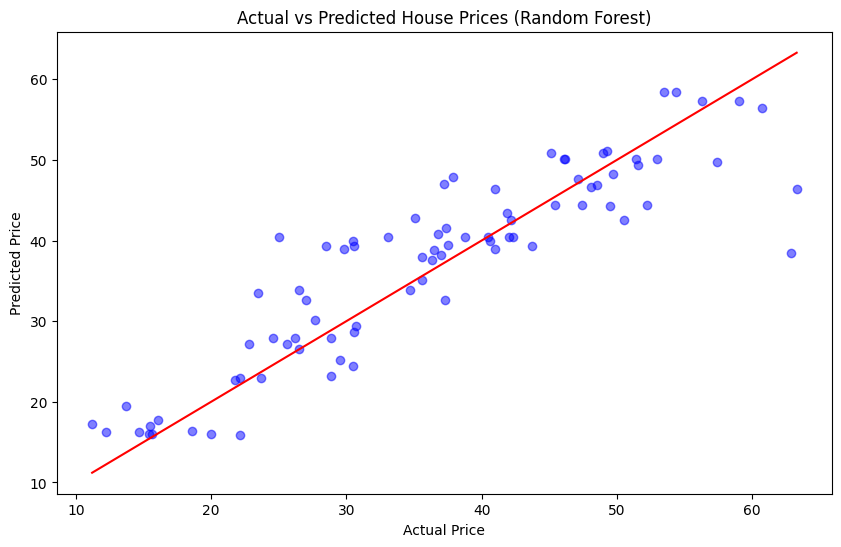

In [47]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, predictions, color='blue', alpha=0.5)
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [45]:
# Training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, Y_train)


LinearRegression()

# **5.   Model Evaluation**




In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics on the training set
mse_train = mean_squared_error(Y_train, regressor.predict(X_train))
mae_train = mean_absolute_error(Y_train, regressor.predict(X_train))
r2_train = r2_score(Y_train, regressor.predict(X_train))

# Calculate evaluation metrics on the testing set
mse = mean_squared_error(Y_test, regressor.predict(X_test))
mae = mean_absolute_error(Y_test, regressor.predict(X_test))
r2 = r2_score(Y_test, regressor.predict(X_test))

# Print
print("Train Set Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R^2):", r2_train)
print("\nTest Set Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Train Set Evaluation:
Mean Squared Error (MSE): 94.6788285759642
Mean Absolute Error (MAE): 6.935770621604179
R-squared (R^2): 0.49663152930227783

Test Set Evaluation:
Mean Squared Error (MSE): 63.90493104707825
Mean Absolute Error (MAE): 6.24355017315149
R-squared (R^2): 0.6190687388692075


*Overall, the model performs reasonably well on both the training and test sets, with relatively low errors and decent R-squared values.*

In [ ]:
# Visualize actual vs. predicted house prices
plt.figure(figsize=(10, 6))
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()


# **6**. **Hyperparameter** **Tuning**






In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Lasso model
lasso_model = Lasso()

# Set up hyperparameter grid for Lasso
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, scoring='neg_mean_squared_error', cv=5)

# Train GridSearchCV for Lasso on training data
lasso_grid_search.fit(X_train, Y_train)

# Print the best parameters for Lasso
print("Best parameters for Lasso:", lasso_grid_search.best_params_)

# Initialize Ridge model
ridge_model = Ridge()

# Set up hyperparameter grid for Ridge
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=5)

# Train GridSearchCV for Ridge on training data
ridge_grid_search.fit(X_train, Y_train)

# Print the best parameters for Ridge
print("Best parameters for Ridge:", ridge_grid_search.best_params_)


In [ ]:
# Lasso Regression with best alpha
best_lasso_model = Lasso(alpha=0.01)
best_lasso_model.fit(X_train, Y_train)

# Predict house prices on the test set
lasso_Y_pred = best_lasso_model.predict(X_test)

# Evaluate performance of Lasso Regression
lasso_mse = mean_squared_error(Y_test, lasso_Y_pred)
lasso_mae = mean_absolute_error(Y_test, lasso_Y_pred)
lasso_r2 = r2_score(Y_test, lasso_Y_pred)

print("Lasso Regression Performance:")
print("Mean Squared Error (MSE):", lasso_mse)
print("Mean Absolute Error (MAE):", lasso_mae)
print("R-squared (R2):", lasso_r2)

# Ridge Regression with best alpha
best_ridge_model = Ridge(alpha=0.1)
best_ridge_model.fit(X_train, Y_train)

# Predict house prices on the test set
ridge_Y_pred = best_ridge_model.predict(X_test)

# Evaluate performance of Ridge Regression
ridge_mse = mean_squared_error(Y_test, ridge_Y_pred)
ridge_mae = mean_absolute_error(Y_test, ridge_Y_pred)
ridge_r2 = r2_score(Y_test, ridge_Y_pred)

print("\nRidge Regression Performance:")
print("Mean Squared Error (MSE):", ridge_mse)
print("Mean Absolute Error (MAE):", ridge_mae)
print("R-squared (R2):", ridge_r2)


*The performance metrics for Lasso and Ridge regression models show marginal improvements compared to the basic Linear Regression model. The slight differences in MSE, MAE, and R2 values between Lasso, Ridge, and Linear Regression models indicate that regularization techniques did not significantly enhance the model's predictive performance in this case*.

# **7. Conclusion and Further Analysis**

***Findings from Model Evaluation:***
*   The linear regression model performed reasonably well on the dataset, with moderate Mean Squared Error, Mean Absolute Error, and R-squared values.
*   The performance of the Lasso and Ridge regression models showed slight improvements over the basic linear regression model but was not significant.






***Limitations and Assumptions:***


*   The dataset may not fully capture the complexity of real-world housing price prediction scenarios, leading to potential model underfitting.



***Potential Avenues for Further Analysis or Model Improvement:***


*   Consider employing advanced machine learning algorithms, such as decision trees, random forests, or gradient boosting machines, to capture complex patterns in the data more effectively.




*I tried using the RandomForest model and it gave better results; however, it's not relevant to the task so I didn't include it in the notebook.*